# 1. Keras Basics

In [4]:
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [5]:
# Attribute Information:

# 1. variance of Wavelet Transformed image (continuous)
# 2. skewness of Wavelet Transformed image (continuous)
# 3. curtosis of Wavelet Transformed image (continuous)
# 4. entropy of image (continuous)
# 5. class (integer)

In [6]:
import numpy as np
from numpy import genfromtxt
data = genfromtxt('./data/bank_note_data.txt', delimiter=',')

In [7]:
data.shape

(1372, 5)

In [8]:
X = data[:, 0:4]
y = data[:, 4]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler_object = MinMaxScaler()
scaler_object.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
scaled_X_train = scaler_object.transform(X_train)

scaled_X_test = scaler_object.transform(X_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
model = Sequential()

In [15]:
model.add(Dense(units=4, input_dim=4, activation="relu"))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Play around with number of epochs as well!
model.fit(scaled_X_train,y_train,epochs=50, verbose=2, validation_data=(scaled_X_test, y_test))

Train on 919 samples, validate on 453 samples
Epoch 1/50
 - 0s - loss: 0.6889 - accuracy: 0.5571 - val_loss: 0.6853 - val_accuracy: 0.5762
Epoch 2/50
 - 0s - loss: 0.6821 - accuracy: 0.5865 - val_loss: 0.6778 - val_accuracy: 0.6225
Epoch 3/50
 - 0s - loss: 0.6744 - accuracy: 0.6268 - val_loss: 0.6703 - val_accuracy: 0.6667
Epoch 4/50
 - 0s - loss: 0.6673 - accuracy: 0.7106 - val_loss: 0.6631 - val_accuracy: 0.7241
Epoch 5/50
 - 0s - loss: 0.6594 - accuracy: 0.7573 - val_loss: 0.6544 - val_accuracy: 0.7417
Epoch 6/50
 - 0s - loss: 0.6499 - accuracy: 0.7715 - val_loss: 0.6441 - val_accuracy: 0.7594
Epoch 7/50
 - 0s - loss: 0.6376 - accuracy: 0.7791 - val_loss: 0.6311 - val_accuracy: 0.7726
Epoch 8/50
 - 0s - loss: 0.6222 - accuracy: 0.7878 - val_loss: 0.6158 - val_accuracy: 0.7594
Epoch 9/50
 - 0s - loss: 0.6032 - accuracy: 0.7606 - val_loss: 0.5973 - val_accuracy: 0.7351
Epoch 10/50
 - 0s - loss: 0.5838 - accuracy: 0.7530 - val_loss: 0.5795 - val_accuracy: 0.7439
Epoch 11/50
 - 0s - los

In [18]:
model.metrics_names

['loss', 'accuracy']

In [19]:
model.evaluate(scaled_X_test, y_test)

453/453 [==============================] - 0s 29us/step


[0.13057939350506328, 0.9624723792076111]

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
predictions = model.predict_classes(scaled_X_test)
confusion_matrix(y_test,predictions)

array([[251,   6],
       [ 11, 185]], dtype=int64)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       257
         1.0       0.97      0.94      0.96       196

    accuracy                           0.96       453
   macro avg       0.96      0.96      0.96       453
weighted avg       0.96      0.96      0.96       453



In [23]:
# Saving and loading models
model.save("myfirstmodel.h5")

In [24]:
from keras.models import load_model

In [25]:
new_model = load_model("myfirstmodel.h5")

In [26]:
new_model.predict_classes(X_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

# 2. Keras-CNN-MNIST

In [27]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_test.shape

(10000, 28, 28)

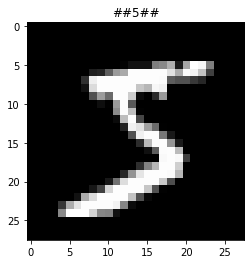

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")
plt.title("##" + str(y_train[0]) + "##")
plt.show()

In [31]:
from keras.utils.np_utils import to_categorical

In [32]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [33]:
x_train = x_train / 255.0

In [34]:
x_test = x_test / 255.0

In [35]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))

model.add(Dense(units=10, activation="softmax"))

In [39]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [41]:
model.fit(x=x_train, y=y_train_cat, epochs=1, validation_data=(x_test, y_test_cat), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 312s 5ms/step - loss: 0.0970 - accuracy: 0.9698 - val_loss: 0.0464 - val_accuracy: 0.9853


In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
model.evaluate(x_test,y_test_cat)

10000/10000 [==============================] - 7s 656us/step


[0.04643938972917385, 0.9853000044822693]

In [44]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       1.00      0.96      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# 3. Keras-CNN-CIFAR-10

In [45]:
# CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

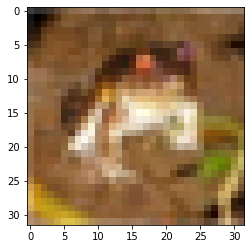

In [46]:
plt.imshow(x_train[0])
plt.show()

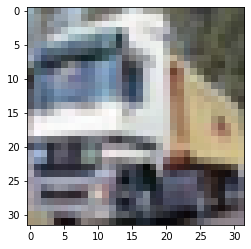

In [47]:
plt.imshow(x_train[1])
plt.show()

In [48]:
# airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck - 10 categories

In [62]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [69]:
# Making grayscale 
x_train = x_train / 255.0

x_test = x_test / 255.0

In [70]:
x_train.shape

(50000, 32, 32, 3)

In [71]:
# making labels categorical 
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [72]:
# # reshaping the images to get into the NN
# x_train2 = x_train.reshape(50000, 32, 32, 1)
# x_test2 = x_test.reshape(50000, 32, 32, 1)

In [73]:
# Create neural network model
model = Sequential()

model.add(Conv2D(filters=32, input_shape=(32, 32, 3), activation="relu", kernel_size=(4, 4), strides=1))
model.add(MaxPool2D(pool_size=(2, 2), strides=1))

model.add(Conv2D(filters=32, input_shape=(32, 32, 3), activation="relu", kernel_size=(4, 4), strides=1))
model.add(MaxPool2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))

model.add(Dense(units=10, activation="softmax"))

In [74]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 32)        16416     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [76]:
model.fit(x=x_train, y=y_train_cat, epochs=1, verbose=2, validation_data=(x_test, y_test_cat))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
 - 211s - loss: 2.3029 - accuracy: 0.0944 - val_loss: 2.3026 - val_accuracy: 0.1000


In [77]:
model.metrics_names

['loss', 'accuracy']

In [78]:
model.evaluate(x_test2,y_cat_test)

NameError: name 'y_cat_test' is not defined

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
# NOTE: we can save the model into an .h5 file and later load it